In [831]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [832]:
# Cargar los datos
data = pd.read_csv('data_limpieza.csv')
data.shape

(8465, 13)

In [833]:
data.head()
headers = data.columns.tolist()
headers

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday']

- **Date**: fecha de la observación
- **Hour**: hora de la observación (0-23)
- **Temperature(C)**: temperatura en grados Celsius
- **Humidity(%)**: humedad relativa
- **Wind speed (m/s)**: velocidad del viento en metros por segundo
- **Visibility (10m)**: visibilidad con una escala de 10 metros
- **Dew point temperature(C)**: temperatura de punto de rocío en grados Celsius
- **Solar Radiation (MJ/m2)**: radiación solar en MegaJoules por metro cuadrado
- **Rainfall(mm)**: nivel de lluvia en milímetros
- **Snowfall (cm)**: nieve en centímetros
- **Seasons**: estación del año
- **Holiday**: si es un día festivo

**Variable de respuesta:** 
- **Rented Bike Count**: ventas del producto publicitado en miles de unidades

In [834]:
# Convertir la columna 'Date' a tipo datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Extraer día, mes y año de la columna 'Date'
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Eliminar la columna 'Date'
data.drop(columns=['Date'], inplace=True)

# Mostrar las primeras filas del DataFrame
data.head()

Rented Bike Count  Hour  Temperature(C)  Humidity(%)  Wind speed (m/s)  \
0                254     0            -5.2           37               2.2   
1                204     1            -5.5           38               0.8   
2                173     2            -6.0           39               1.0   
3                107     3            -6.2           40               0.9   
4                 78     4            -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(C)  Solar Radiation (MJ/m2)  \
0              2000                     -17.6                      0.0   
1              2000                     -17.6                      0.0   
2              2000                     -17.7                      0.0   
3              2000                     -17.6                      0.0   
4              2000                     -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday   Day  Month    Year  
0           0.0            0.0  Winter  No Holiday  12.0    1.0  2017.0  
1           0.0            0.0  Winter  No Holiday  12.0    1.0  2017.0  
2           0.0            0.0  Winter  No Holiday  12.0    1.0  2017.0  
3           0.0            0.0  Winter  No Holiday  12.0    1.0  2017.0  
4           0.0            0.0  Winter  No Holiday  12.0    1.0  2017.0

In [835]:
# Realizo una copia del DataFrame original
data_encoded = data.copy()

# Codificar las columnas categóricas en la copia
data_encoded['Seasons'] = data_encoded['Seasons'].astype('category').cat.codes
data_encoded['Holiday'] = data_encoded['Holiday'].astype('category').cat.codes


In [836]:
data_encoded.describe()

Rented Bike Count         Hour  Temperature(C)  Humidity(%)  \
count        8465.000000  8465.000000     8465.000000  8465.000000   
mean          729.156999    11.507029       12.771057    58.147194   
std           642.351166     6.920899       12.104375    20.484839   
min             2.000000     0.000000      -17.800000     0.000000   
25%           214.000000     6.000000        3.000000    42.000000   
50%           542.000000    12.000000       13.500000    57.000000   
75%          1084.000000    18.000000       22.700000    74.000000   
max          3556.000000    23.000000       39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
count       8465.000000       8465.000000               8465.000000   
mean           1.725883       1433.873479                  3.944997   
std            1.034281        609.051229                 13.242399   
min            0.000000         27.000000                -30.600000   
25%            0.900000        935.000000                 -5.100000   
50%            1.500000       1690.000000                  4.700000   
75%            2.300000       2000.000000                 15.200000   
max            7.400000       2000.000000                 27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)      Seasons  \
count              8465.000000    8465.00000    8465.000000  8465.000000   
mean                  0.567868       0.14912       0.077685     1.542351   
std                   0.868245       1.12554       0.444063     1.102876   
min                   0.000000       0.00000       0.000000     0.000000   
25%                   0.000000       0.00000       0.000000     1.000000   
50%                   0.010000       0.00000       0.000000     2.000000   
75%                   0.930000       0.00000       0.000000     3.000000   
max                   3.520000      35.00000       8.800000     3.000000   

           Holiday          Day        Month         Year  
count  8465.000000  3257.000000  3257.000000  3257.000000  
mean      0.951802     6.345103     6.486337  2017.911575  
std       0.214198     3.437584     3.468250     0.283955  
min       0.000000     1.000000     1.000000  2017.000000  
25%       1.000000     3.000000     3.000000  2018.000000  
50%       1.000000     6.000000     7.000000  2018.000000  
75%       1.000000     9.000000    10.000000  2018.000000  
max       1.000000    12.000000    12.000000  2018.000000

### Incluir seaborn para Visualización

In [837]:
import seaborn as sns

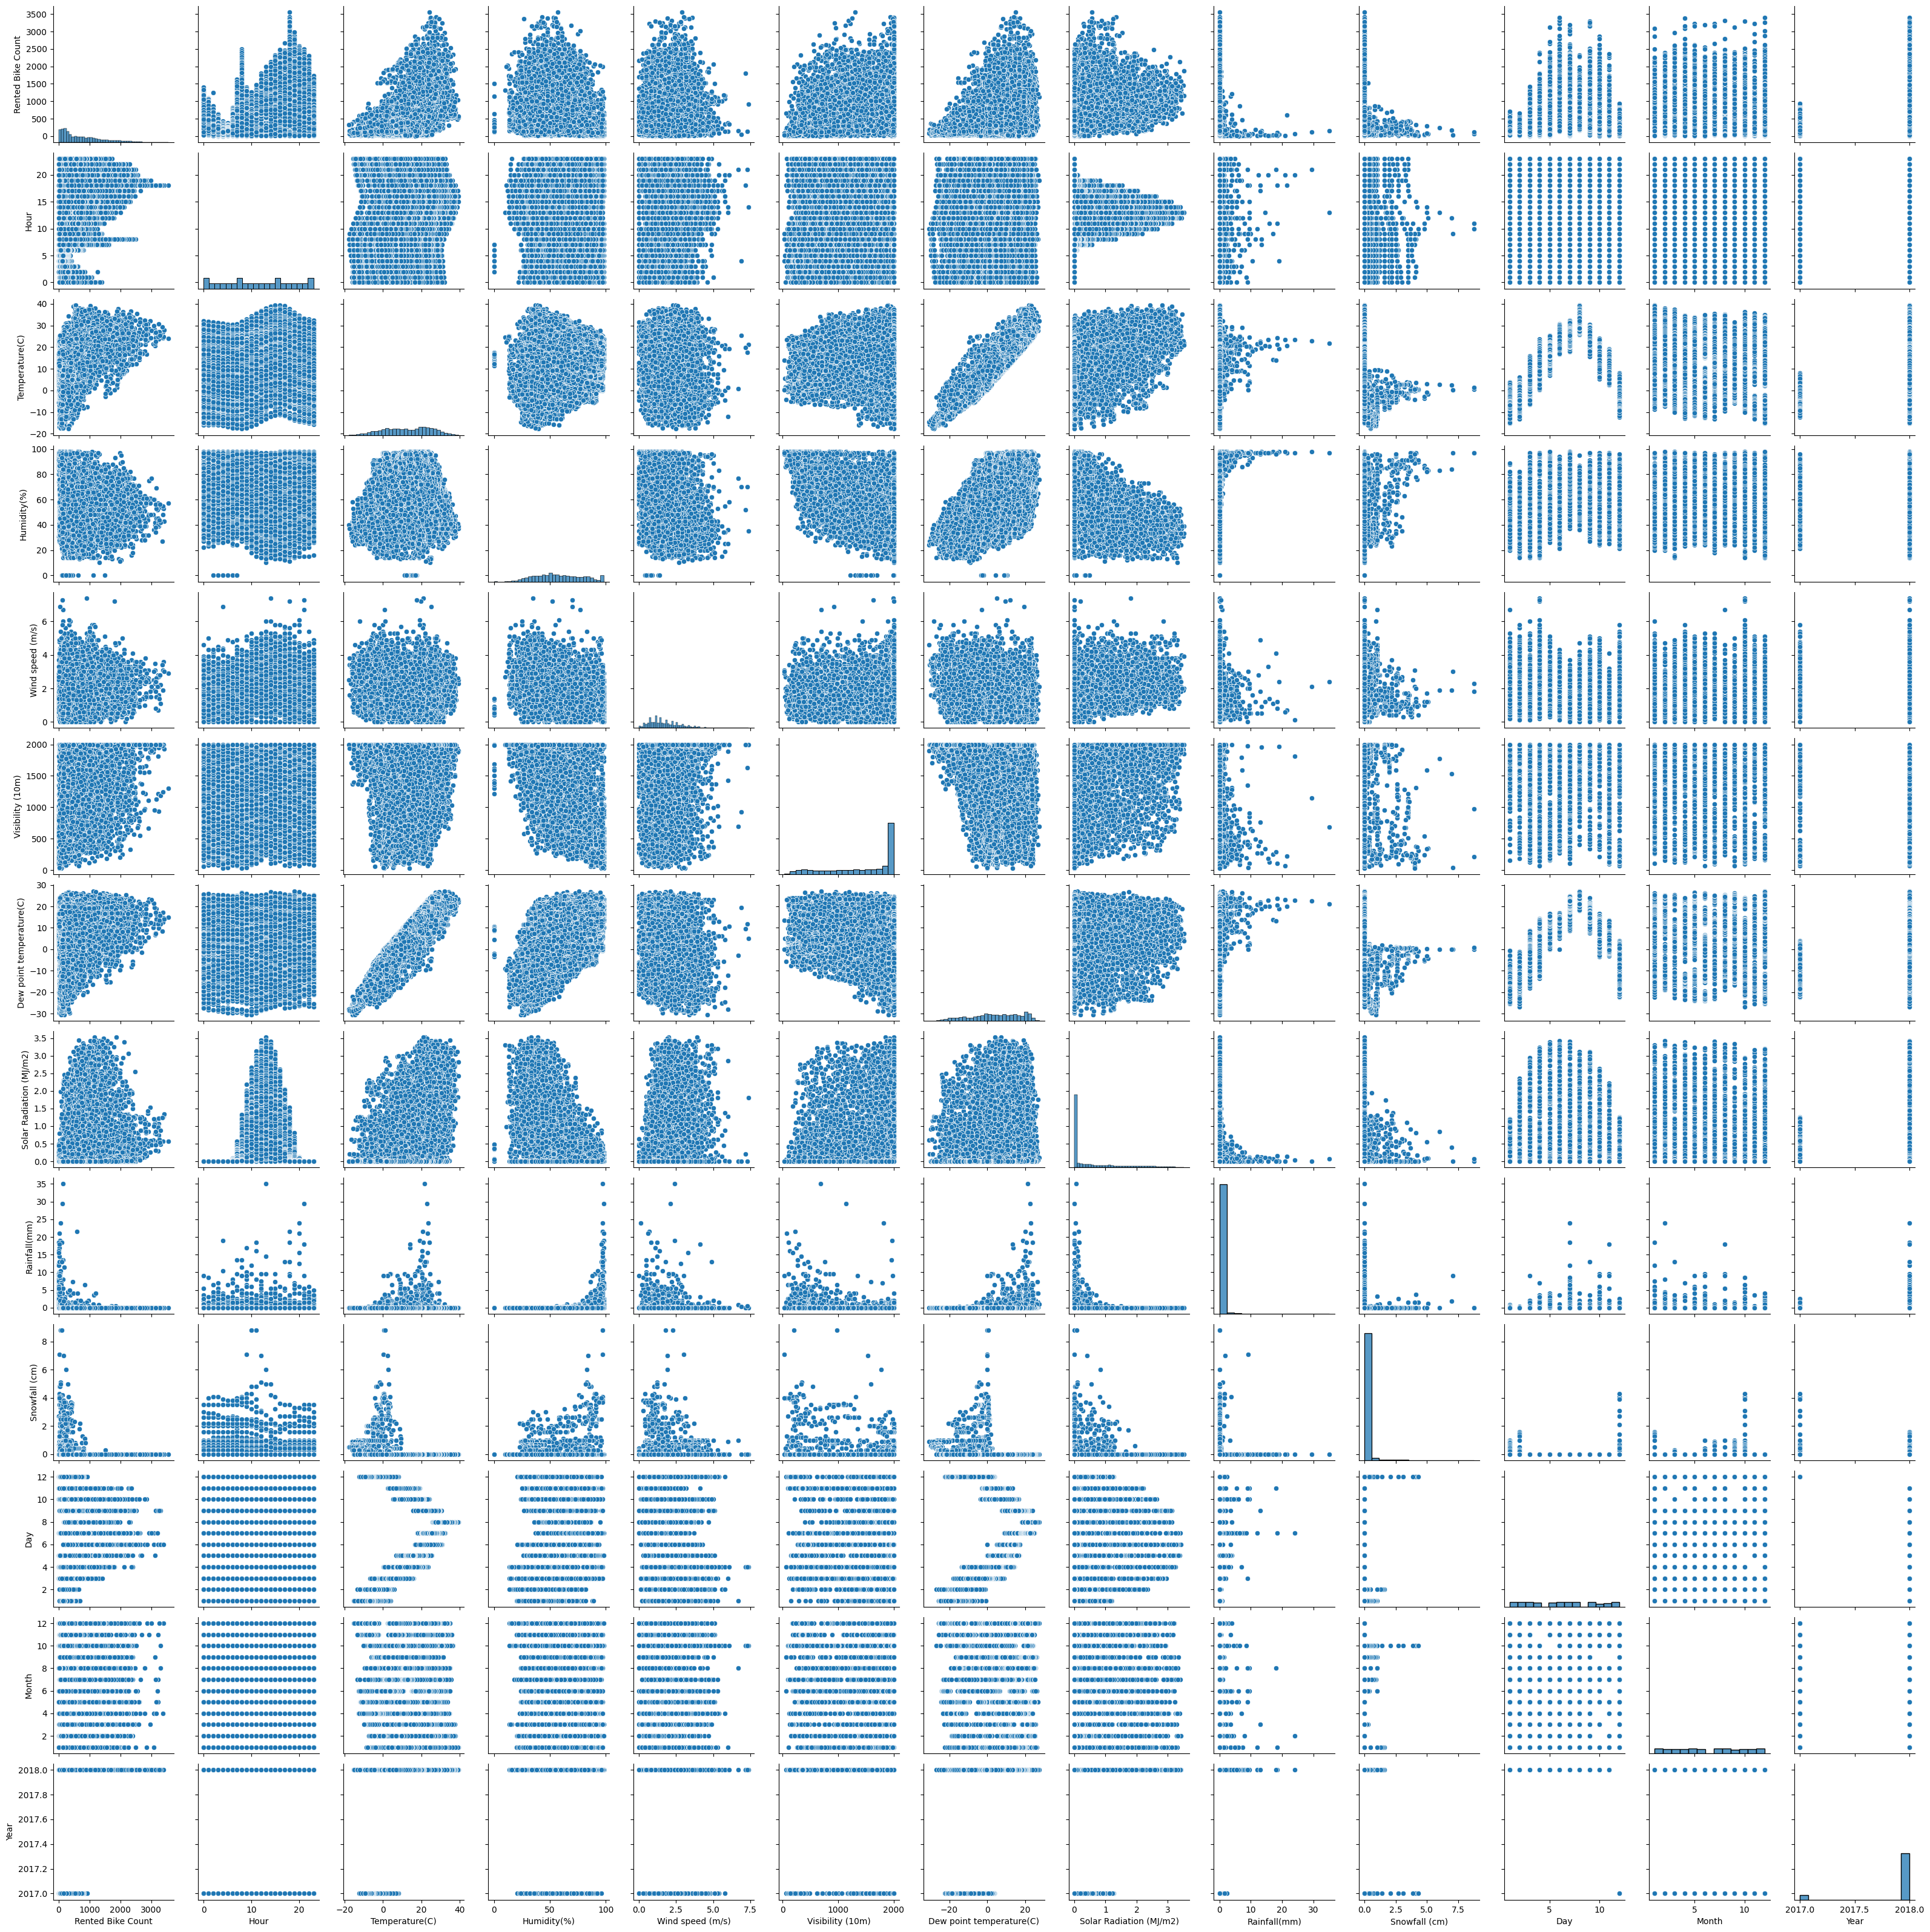

In [838]:
sns.pairplot(data,)

### Matriz de correlación

<Axes: >

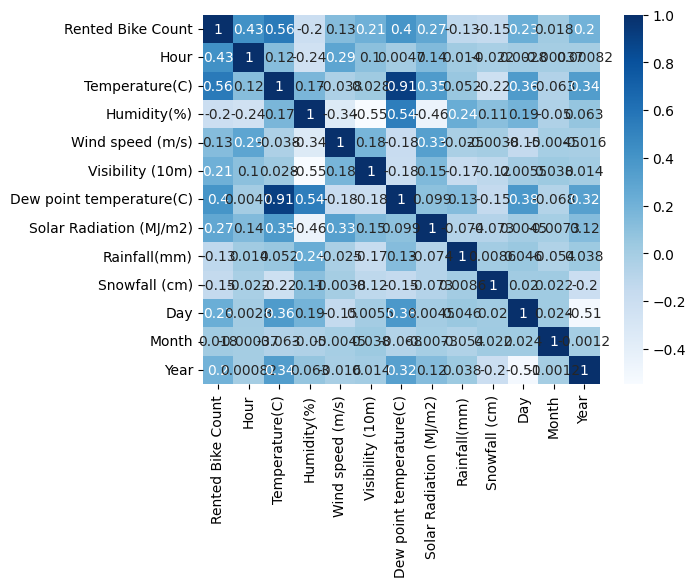

In [839]:
# Excluir columnas no numéricas
numeric_data = data.select_dtypes(include=[float, int])

# Calcular la matriz de correlación
corr = numeric_data.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

<Axes: >

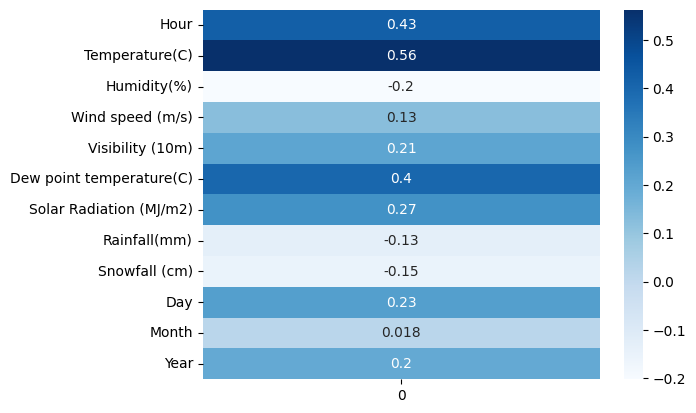

In [840]:
corrw = numeric_data.drop(['Rented Bike Count'], axis=1).corrwith(data['Rented Bike Count'])
sns.heatmap(pd.DataFrame(corrw), cmap="Blues", annot=True)

### Diagramas de dispersión y tendencia entre variables de entrada y variable de respuesta

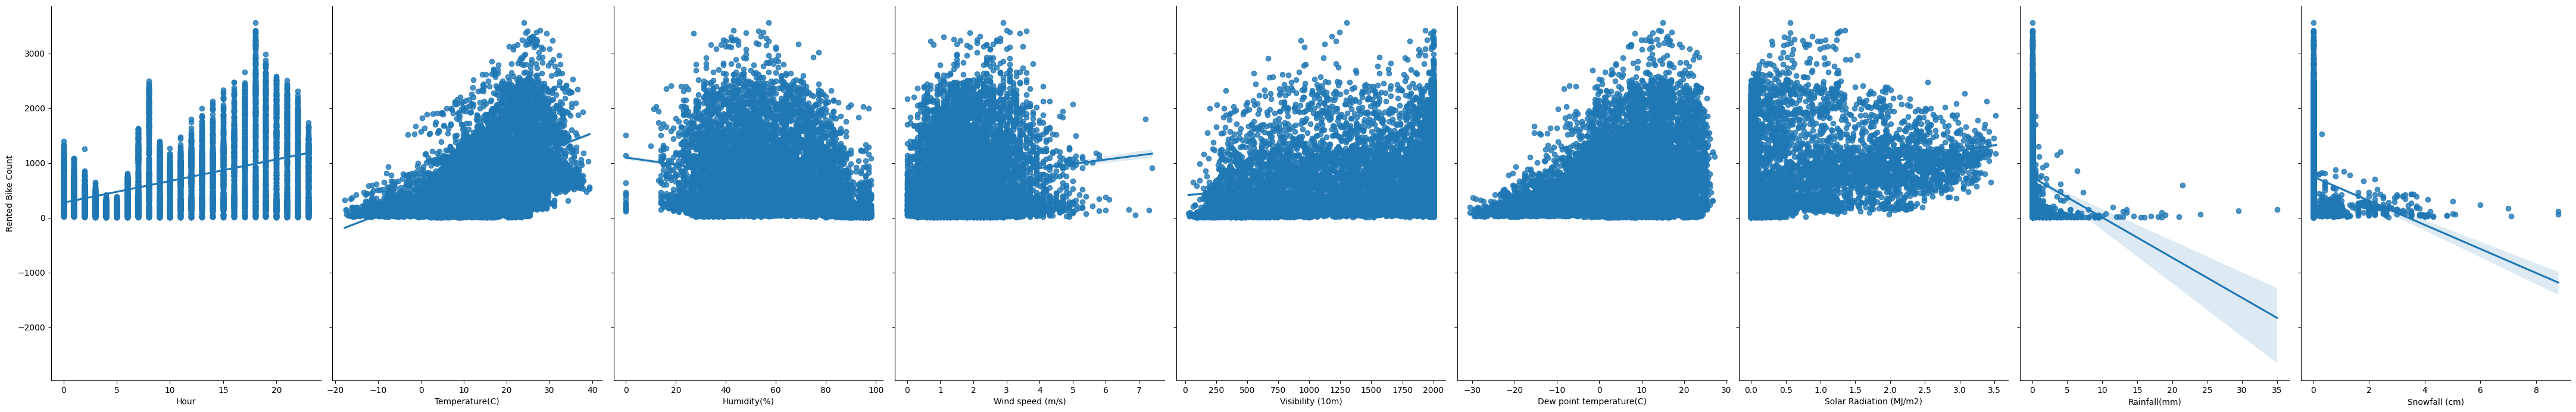

In [841]:


sns.pairplot(numeric_data, x_vars=[
'Hour',
 'Temperature(C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)'], y_vars='Rented Bike Count', height=7, aspect=0.7, kind='reg')

**Normalidad**

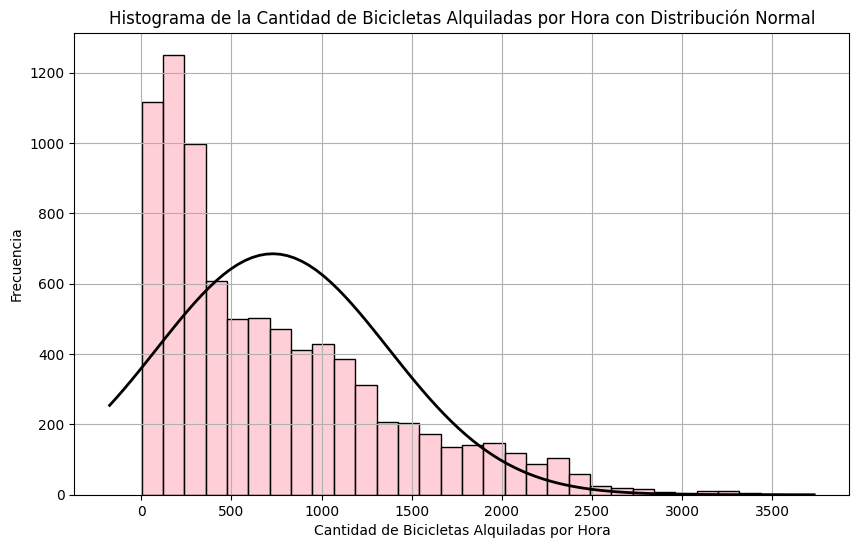

In [842]:
from scipy.stats import norm

# Crear el histograma de la cantidad de bicicletas alquiladas
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Rented Bike Count', bins=30, kde=False, color='#FFC0CB')

# Calcular la media y desviación estándar de la cantidad de bicicletas alquiladas
mean = data['Rented Bike Count'].mean()
std = data['Rented Bike Count'].std()

# Crear un rango de valores para la distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

# Graficar la línea de la distribución normal
plt.plot(x, p * len(data) * (xmax - xmin) / 30, 'k', linewidth=2)

# Añadir etiquetas y título
plt.xlabel('Cantidad de Bicicletas Alquiladas por Hora')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Cantidad de Bicicletas Alquiladas por Hora con Distribución Normal')
plt.grid(True)
plt.show()

In [843]:
from scipy.stats import kstest, norm

# Seleccionar la variable dependiente

rented_bike_count = data['Rented Bike Count']

# Realizar la prueba de Kolmogorov-Smirnov
ks_statistic, p_value = kstest(rented_bike_count, 'norm', args=(rented_bike_count.mean(), rented_bike_count.std()))

# Mostrar los resultados
print(f'Estadístico de Kolmogorov-Smirnov: {ks_statistic}')
print(f'Valor p: {p_value}')

# Interpretar el resultado
alpha = 0.05
if p_value < alpha:
    print("La variable dependiente no sigue una distribución normal (rechazar H0)")
else:
    print("La variable dependiente sigue una distribución normal (no rechazar H0)")

Estadístico de Kolmogorov-Smirnov: 0.12887712035253535
Valor p: 4.90060238564064e-123
La variable dependiente no sigue una distribución normal (rechazar H0)


**Box-Cox transformation**

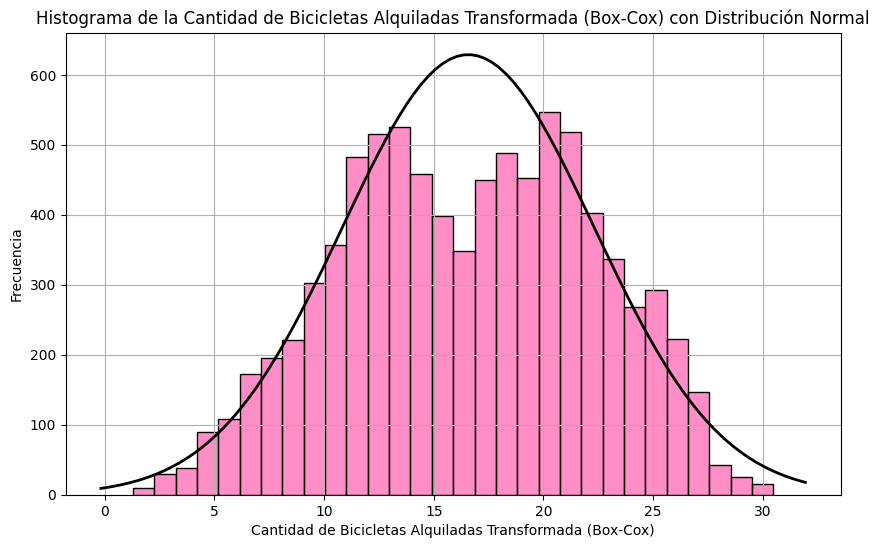

Valor de lambda para la transformación de Box-Cox: 0.2730547113417922


In [916]:
from scipy.stats import boxcox
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Seleccionar la variable dependiente
rented_bike_count = data['Rented Bike Count']

# Aplicar la transformación de Box-Cox
rented_bike_count_transformed, lambda_value = boxcox(rented_bike_count + 1)  # Añadir 1 para evitar problemas con valores cero

# Añadir la columna transformada al DataFrame
data['Rented Bike Count Transformed'] = rented_bike_count_transformed

# Crear el histograma de la cantidad de bicicletas alquiladas transformada
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Rented Bike Count Transformed', bins=30, kde=False, color='#FF69B4')

# Calcular la media y desviación estándar de la cantidad de bicicletas alquiladas transformada
mean_transformed = data['Rented Bike Count Transformed'].mean()
std_transformed = data['Rented Bike Count Transformed'].std()

# Crear un rango de valores para la distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_transformed, std_transformed)

# Graficar la línea de la distribución normal
plt.plot(x, p * len(data) * (xmax - xmin) / 30, 'k', linewidth=2)

# Añadir etiquetas y título
plt.xlabel('Cantidad de Bicicletas Alquiladas Transformada (Box-Cox)')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Cantidad de Bicicletas Alquiladas Transformada (Box-Cox) con Distribución Normal')
plt.grid(True)
plt.show()

# Mostrar el valor de lambda
print(f'Valor de lambda para la transformación de Box-Cox: {lambda_value}')

**Transformacion raiz cuadrada**

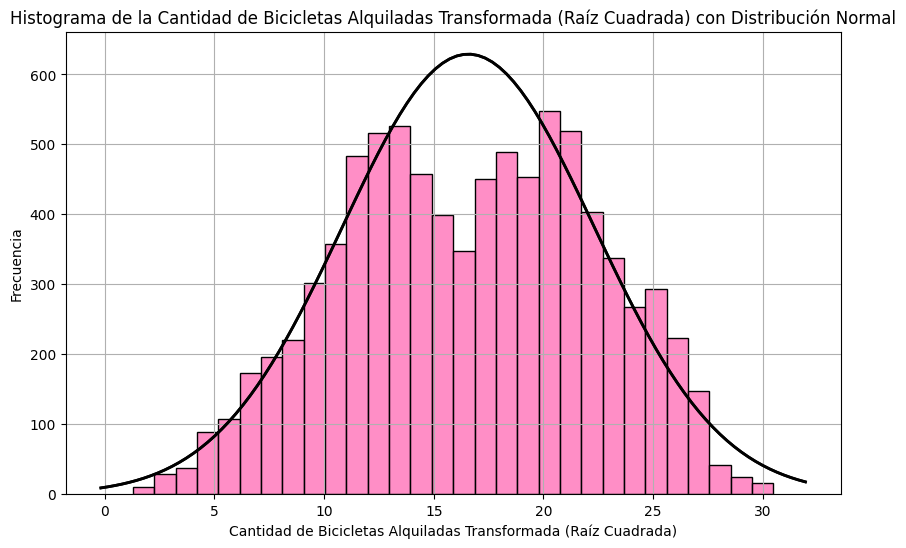

In [917]:
from scipy.stats import boxcox
import numpy as np
# Seleccionar la variable dependiente
rented_bike_count = data['Rented Bike Count']

# Aplicar la transformación de Box-Cox
rented_bike_count_transformed = np.sqrt(rented_bike_count)  # Añadir 1 para evitar problemas con valores cero

# Añadir la columna transformada al DataFrame
data['Rented Bike Count Transformed2'] = rented_bike_count_transformed

# Crear el histograma de la cantidad de bicicletas alquiladas transformada
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Rented Bike Count Transformed', bins=30, kde=False,  color='#FF69B4')

# Calcular la media y desviación estándar de la cantidad de bicicletas alquiladas transformada
mean_transformed = data['Rented Bike Count Transformed'].mean()
std_transformed = data['Rented Bike Count Transformed'].std()
# Crear un rango de valores para la distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_transformed, std_transformed)

# Graficar la línea de la distribución normal
plt.plot(x, p * len(data) * (xmax - xmin) / 30, 'k', linewidth=2)

# Graficar la línea de la distribución normal
plt.plot(x, p * len(data) * (xmax - xmin) / 30, 'k', linewidth=2)

# Añadir etiquetas y título
plt.xlabel('Cantidad de Bicicletas Alquiladas Transformada (Raíz Cuadrada)')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Cantidad de Bicicletas Alquiladas Transformada (Raíz Cuadrada) con Distribución Normal')
plt.grid(True)
plt.show()

### Modelo de regresión

$y = \beta_0 + \beta_1 \times \text{Hour} + \beta_2 \times \text{Temperature} + \beta_3 \times \text{Humidity} + \beta_4 \times \text{Wind speed} + \beta_5 \times \text{Visibility} + \beta_6 \times \text{Dew point temperature} + \beta_7 \times \text{Solar Radiation} + \beta_8 \times \text{Rainfall} + \beta_9 \times \text{Snowfall} + \alpha_1 \times \text{Seasons} + \alpha_2 \times \text{Holiday}$

**Variables Explicativas**

In [845]:
# nombres de características
features = ['Hour', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
            'Dew point temperature(C)','Solar Radiation (MJ/m2)', 'Rainfall(mm)','Snowfall (cm)','Seasons','Holiday']

X = data[features]
X = pd.get_dummies(X, columns=['Hour','Seasons','Holiday'], dtype=int, drop_first=True)

X.head()

Temperature(C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0            -5.2           37               2.2              2000   
1            -5.5           38               0.8              2000   
2            -6.0           39               1.0              2000   
3            -6.2           40               0.9              2000   
4            -6.0           36               2.3              2000   

   Dew point temperature(C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                     -17.6                      0.0           0.0   
1                     -17.6                      0.0           0.0   
2                     -17.7                      0.0           0.0   
3                     -17.6                      0.0           0.0   
4                     -18.6                      0.0           0.0   

   Snowfall (cm)  Hour_1  Hour_2  ...  Hour_18  Hour_19  Hour_20  Hour_21  \
0            0.0       0       0  ...        0        0        0        0   
1            0.0       1       0  ...        0        0        0        0   
2            0.0       0       1  ...        0        0        0        0   
3            0.0       0       0  ...        0        0        0        0   
4            0.0       0       0  ...        0        0        0        0   

   Hour_22  Hour_23  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
0        0        0               0               0               1   
1        0        0               0               0               1   
2        0        0               0               0               1   
3        0        0               0               0               1   
4        0        0               0               0               1   

   Holiday_No Holiday  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  

[5 rows x 35 columns]

In [846]:
X.shape

(8465, 35)

**Variable de respuesta**

In [847]:
# variable de respuesta
import numpy as np

Y = data['Rented Bike Count Transformed']
Y.head()

0    12.966781
1    12.004722
2    11.318801
3     9.489563
4     8.413264
Name: Rented Bike Count Transformed, dtype: float64

**Tipo de datos por variables**

In [848]:
# tipos de X y y
print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### Modelo con todas las variables

In [849]:
from sklearn import metrics
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)


In [850]:
# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS)
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Rented Bike Count Transformed   R-squared:                       0.745
Model:                                       OLS   Adj. R-squared:                  0.743
Method:                            Least Squares   F-statistic:                     560.9
Date:                           Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                                   14:41:35   Log-Likelihood:                -16824.
No. Observations:                           6772   AIC:                         3.372e+04
Df Residuals:                               6736   BIC:                         3.397e+04
Df Model:                                     35                                         
Covariance Type:                       nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------

## Verificacion de problemas en el modelo de regresion lineal

**Verificacion de multicolinialidad con estos datos**

In [852]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Agrega una columna constante al DataFrame si aún no está presente
# Esto es necesario para calcular el VIF correctamente
df_with_const = add_constant(X)

# Calcula el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Filtra solo las filas correspondientes a las variables explicativas (no la constante)
vif_data = vif_data[vif_data["Variable"] != "const"]

# Imprime los resultados
print(vif_data)

                    Variable         VIF
1             Temperature(C)   94.721803
2                Humidity(%)   20.633111
3           Wind speed (m/s)    1.400216
4           Visibility (10m)    1.727412
5   Dew point temperature(C)  121.678055
6    Solar Radiation (MJ/m2)    4.630201
7               Rainfall(mm)    1.105280
8              Snowfall (cm)    1.123390
9                     Hour_1    1.919063
10                    Hour_2    1.921952
11                    Hour_3    1.924388
12                    Hour_4    1.925622
13                    Hour_5    1.931295
14                    Hour_6    1.934204
15                    Hour_7    1.939494
16                    Hour_8    1.963613
17                    Hour_9    2.053043
18                   Hour_10    2.214663
19                   Hour_11    2.394130
20                   Hour_12    2.532570
21                   Hour_13    2.580863
22                   Hour_14    2.509661
23                   Hour_15    2.391091
24              

El modelo presenta un problema de multicolinealidad, por lo que se debe realizar un análisis de componentes principales para reducir la dimensionalidad de los datos.

La multicolinealidad imperfecta ocurre cuando las columnas de la matriz XTX son casi linealmente
dependientes, lo que resulta en un determinante cercano a cero. Esto implica que es posible calcular la
inversa de la matriz, pero los valores resultantes serán muy grandes en valor absoluto. Para abordar este
problema, se propone eliminar las variables que presenten la mayor correlación entre sí. Posteriormente,
se puede recalcular el factor de inflación de la varianza (VIF) en el nuevo modelo sin estas variables para
determinar si se ha resuelto el problema de multicolinealidad imperfecta. En este modelo en especifico al
determinar la matriz de correlación entre las variables se obtuvo el siguiente resultado:

<Axes: >

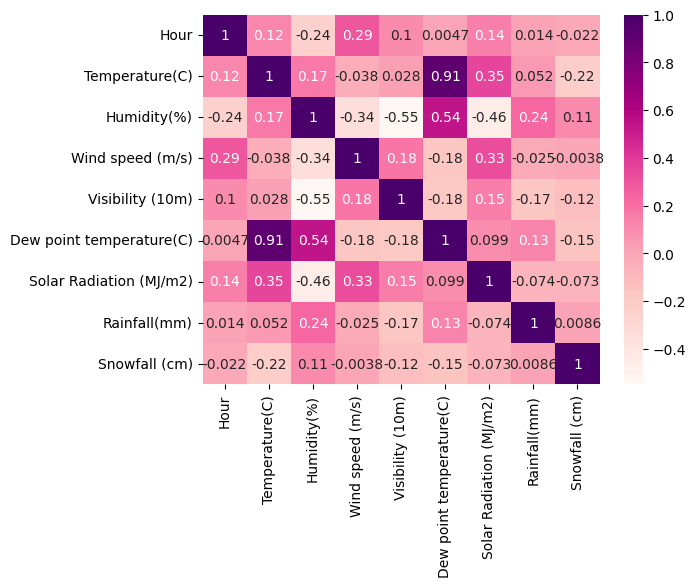

In [913]:
numeric_data_without_target = numeric_data.drop(columns=['Rented Bike Count', 'Day', 'Month', 'Year'])

# Calcular la matriz de correlación
corr = numeric_data_without_target.corr()
sns.heatmap(corr, cmap="RdPu", annot=True)

A partir de los resultados obtenidos, se observa que la variable "Dew Point Temperature (C)" presenta la correlación más alta con respecto a las demás variables. Por lo tanto, como solución se propone eliminar esta variable del modelo.

In [854]:
X_reduced = X.drop(columns=['Dew point temperature(C)'])

# Esto es necesario para calcular el VIF correctamente
df_with_const = add_constant(X_reduced)

# Calcula el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Filtra solo las filas correspondientes a las variables explicativas (no la constante)
vif_data = vif_data[vif_data["Variable"] != "const"]

# Imprime los resultados
print(vif_data)

                   Variable       VIF
1            Temperature(C)  5.521434
2               Humidity(%)  2.764442
3          Wind speed (m/s)  1.400215
4          Visibility (10m)  1.722780
5   Solar Radiation (MJ/m2)  4.488350
6              Rainfall(mm)  1.090882
7             Snowfall (cm)  1.117063
8                    Hour_1  1.919058
9                    Hour_2  1.921946
10                   Hour_3  1.924354
11                   Hour_4  1.925558
12                   Hour_5  1.931146
13                   Hour_6  1.934185
14                   Hour_7  1.938997
15                   Hour_8  1.962642
16                   Hour_9  2.048300
17                  Hour_10  2.208556
18                  Hour_11  2.389256
19                  Hour_12  2.530231
20                  Hour_13  2.580788
21                  Hour_14  2.508344
22                  Hour_15  2.387732
23                  Hour_16  2.227620
24                  Hour_17  2.097135
25                  Hour_18  2.013080
26          

Tras realizar el cambio y volver a calcular los valores del VIF (factor de inflación de la varianza), se ha observado que estos
son inferiores a 10. Este resultado indica que se ha solucionado el problema de multicolinealidad en el modelo.

In [855]:
### Modelo con las variables sin multicolinealidad
# nombres de características
features = ['Hour', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
            'Solar Radiation (MJ/m2)', 'Rainfall(mm)','Snowfall (cm)','Seasons','Holiday']


X_Reduce = data[features]
X_Reduce = pd.get_dummies(X_Reduce, columns=['Hour','Seasons','Holiday'], dtype=int, drop_first=True)

X_Reduce.head()

Temperature(C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0            -5.2           37               2.2              2000   
1            -5.5           38               0.8              2000   
2            -6.0           39               1.0              2000   
3            -6.2           40               0.9              2000   
4            -6.0           36               2.3              2000   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Hour_1  Hour_2  \
0                      0.0           0.0            0.0       0       0   
1                      0.0           0.0            0.0       1       0   
2                      0.0           0.0            0.0       0       1   
3                      0.0           0.0            0.0       0       0   
4                      0.0           0.0            0.0       0       0   

   Hour_3  ...  Hour_18  Hour_19  Hour_20  Hour_21  Hour_22  Hour_23  \
0       0  ...        0        0        0        0        0        0   
1       0  ...        0        0        0        0        0        0   
2       0  ...        0        0        0        0        0        0   
3       1  ...        0        0        0        0        0        0   
4       0  ...        0        0        0        0        0        0   

   Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  
0               0               0               1                   1  
1               0               0               1                   1  
2               0               0               1                   1  
3               0               0               1                   1  
4               0               0               1                   1  

[5 rows x 34 columns]

In [857]:
X_trainSM, X_test, y_train, y_test = train_test_split(X_Reduce, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_trainSM = sm.add_constant(X_trainSM)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS)
modelSM = sm.OLS(y_train, X_trainSM).fit()

# resumen de resultados
print(modelSM.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Rented Bike Count Transformed   R-squared:                       0.740
Model:                                       OLS   Adj. R-squared:                  0.739
Method:                            Least Squares   F-statistic:                     564.0
Date:                           Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                                   14:43:19   Log-Likelihood:                -16883.
No. Observations:                           6772   AIC:                         3.384e+04
Df Residuals:                               6737   BIC:                         3.408e+04
Df Model:                                     34                                         
Covariance Type:                       nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------

**Verificacion de Heterocedasticidad con estos datos**

In [858]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(modelSM.resid, modelSM.model.exog)

# Extraer los resultados del test
bp_test_stat = bp_test[0]
bp_test_pvalue = bp_test[1]
bp_test_fvalue = bp_test[2]
bp_test_f_pvalue = bp_test[3]

# Imprimir los resultados
print(f"Breusch-Pagan Test Statistic: {bp_test_stat}")
print(f"Breusch-Pagan Test p-value: {bp_test_pvalue}")
print(f"Breusch-Pagan Test F-Statistic: {bp_test_fvalue}")
print(f"Breusch-Pagan Test F p-value: {bp_test_f_pvalue}")

Breusch-Pagan Test Statistic: 1532.7754830690085
Breusch-Pagan Test p-value: 1.004015838573276e-300
Breusch-Pagan Test F-Statistic: 57.969448116884166
Breusch-Pagan Test F p-value: 0.0


In [859]:
import numpy as np
# Aplicar la transformación logarítmica a la variable dependiente
y_log = np.log(Y + 1)  # Se suma 1 para evitar log(0)

X_trainHomo, X_test, y_trainHomo, y_test = train_test_split(X_Reduce, y_log, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_trainHomo = sm.add_constant(X_trainHomo)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS)
modelHomo = sm.OLS(y_trainHomo, X_trainHomo).fit()

# Realizar el test de Breusch-Pagan
bp_test_log = het_breuschpagan(modelHomo.resid, modelHomo.model.exog)

# Extraer los resultados del test
bp_test_stat_log = bp_test_log[0]
bp_test_pvalue_log = bp_test_log[1]
bp_test_fvalue_log = bp_test_log[2]
bp_test_f_pvalue_log = bp_test_log[3]

# Imprimir los resultados
print(f"Breusch-Pagan Test Statistic (log): {bp_test_stat_log}")
print(f"Breusch-Pagan Test p-value (log): {bp_test_pvalue_log}")
print(f"Breusch-Pagan Test F-Statistic (log): {bp_test_fvalue_log}")
print(f"Breusch-Pagan Test F p-value (log): {bp_test_f_pvalue_log}")


Breusch-Pagan Test Statistic (log): 1670.2366117746706
Breusch-Pagan Test p-value (log): 0.0
Breusch-Pagan Test F-Statistic (log): 64.87021192052015
Breusch-Pagan Test F p-value (log): 0.0


In [861]:
# Estrategia 3: Modelos de Regresión Ponderada

X_trainSM, X_test, y_train, y_test = train_test_split(X_Reduce, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_trainSM = sm.add_constant(X_trainSM)

# Ajustar el modelo OLS inicial para obtener los residuos
modelSM = sm.OLS(y_train, X_trainSM).fit()

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS)

weights = 1 / modelSM.resid**2
model_weighted = sm.WLS(y_train, X_trainSM, weights=weights).fit()
print(model_weighted.summary())

# Realizar el test de Breusch-Pagan en el modelo ponderado
bp_test_weighted = het_breuschpagan(model_weighted.resid, model_weighted.model.exog)

# Extraer los resultados del test
bp_test_stat_weighted = bp_test_weighted[0]
bp_test_pvalue_weighted = bp_test_weighted[1]
bp_test_fvalue_weighted = bp_test_weighted[2]
bp_test_f_pvalue_weighted = bp_test_weighted[3]

# Imprimir los resultados del test
print(f"Breusch-Pagan Test Statistic (weighted): {bp_test_stat_weighted}")
print(f"Breusch-Pagan Test p-value (weighted): {bp_test_pvalue_weighted}")
print(f"Breusch-Pagan Test F-Statistic (weighted): {bp_test_fvalue_weighted}")
print(f"Breusch-Pagan Test F p-value (weighted): {bp_test_f_pvalue_weighted}")

                                  WLS Regression Results                                 
Dep. Variable:     Rented Bike Count Transformed   R-squared:                       1.000
Model:                                       WLS   Adj. R-squared:                  1.000
Method:                            Least Squares   F-statistic:                 4.936e+07
Date:                           Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                                   15:32:36   Log-Likelihood:                -11632.
No. Observations:                           6772   AIC:                         2.333e+04
Df Residuals:                               6737   BIC:                         2.357e+04
Df Model:                                     34                                         
Covariance Type:                       nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------

In [863]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan


# Ajustar el modelo OLS con errores estándar robustos
model_robust = sm.OLS(y_train, X_trainSM).fit(cov_type='HC3')

# Imprimir el resumen del modelo
print(model_robust.summary())

# Realizar el test de Breusch-Pagan en el modelo robusto
bp_test_robust = het_breuschpagan(model_robust.resid, model_robust.model.exog)

# Extraer los resultados del test
bp_test_stat_robust = bp_test_robust[0]
bp_test_pvalue_robust = bp_test_robust[1]
bp_test_fvalue_robust = bp_test_robust[2]
bp_test_f_pvalue_robust = bp_test_robust[3]

# Imprimir los resultados del test
print(f"Breusch-Pagan Test Statistic (robust): {bp_test_stat_robust}")
print(f"Breusch-Pagan Test p-value (robust): {bp_test_pvalue_robust}")
print(f"Breusch-Pagan Test F-Statistic (robust): {bp_test_fvalue_robust}")
print(f"Breusch-Pagan Test F p-value (robust): {bp_test_f_pvalue_robust}")

                                  OLS Regression Results                                 
Dep. Variable:     Rented Bike Count Transformed   R-squared:                       0.740
Model:                                       OLS   Adj. R-squared:                  0.739
Method:                            Least Squares   F-statistic:                     712.6
Date:                           Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                                   15:33:50   Log-Likelihood:                -16883.
No. Observations:                           6772   AIC:                         3.384e+04
Df Residuals:                               6737   BIC:                         3.408e+04
Df Model:                                     34                                         
Covariance Type:                             HC3                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
--------

In [681]:
import matplotlib.pyplot as plt
'''
# Graficar los residuales al cuadrado respecto a cada variable independiente
for column in X_train.columns:
    if column != 'const':  # Omitir la constante
        plt.figure(figsize=(10, 6))
        plt.scatter(X_train[column], modelSM.resid**2)
        plt.xlabel(column)
        plt.ylabel('Residuals^2')
        plt.title(f'Residuals^2 vs {column}')
        plt.show()

# Graficar los residuales respecto a cada variable independiente
for column in X_train.columns:
    if column != 'const':  # Omitir la constante
        plt.figure(figsize=(10, 6))
        plt.scatter(X_train[column], model.resid)
        plt.xlabel(column)
        plt.ylabel('Residuals')
        plt.title(f'Residuals vs {column}')
        plt.show()'''

"\n# Graficar los residuales al cuadrado respecto a cada variable independiente\nfor column in X_train.columns:\n    if column != 'const':  # Omitir la constante\n        plt.figure(figsize=(10, 6))\n        plt.scatter(X_train[column], modelSM.resid**2)\n        plt.xlabel(column)\n        plt.ylabel('Residuals^2')\n        plt.title(f'Residuals^2 vs {column}')\n        plt.show()\n\n# Graficar los residuales respecto a cada variable independiente\nfor column in X_train.columns:\n    if column != 'const':  # Omitir la constante\n        plt.figure(figsize=(10, 6))\n        plt.scatter(X_train[column], model.resid)\n        plt.xlabel(column)\n        plt.ylabel('Residuals')\n        plt.title(f'Residuals vs {column}')\n        plt.show()"

**Verificacion de Especificación con estos datos**

In [865]:
### Modelo con las variables significativas
# nombres de características
features = ['Hour', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
            'Solar Radiation (MJ/m2)', 'Rainfall(mm)','Snowfall (cm)','Seasons','Holiday']

X_Reduce = data[features]
X_Reduce = pd.get_dummies(X_Reduce, columns=['Hour','Seasons','Holiday'], dtype=int, drop_first=True)

X_trainES, X_test, y_trainES, y_test = train_test_split(X_Reduce, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_trainES = sm.add_constant(X_trainES)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS)
modelES = sm.OLS(y_trainES, X_trainES).fit()

# resumen de resultados
print(modelES.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Rented Bike Count Transformed   R-squared:                       0.740
Model:                                       OLS   Adj. R-squared:                  0.739
Method:                            Least Squares   F-statistic:                     564.0
Date:                           Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                                   15:35:03   Log-Likelihood:                -16883.
No. Observations:                           6772   AIC:                         3.384e+04
Df Residuals:                               6737   BIC:                         3.408e+04
Df Model:                                     34                                         
Covariance Type:                       nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------

In [866]:
from statsmodels.stats.diagnostic import linear_reset


reset_test = linear_reset(modelES, power=2, use_f=True)

# Imprimir los resultados del test
print(reset_test)

<F test: F=388.74168197044594, p=3.547817889505826e-84, df_denom=6.74e+03, df_num=1>


Ya que el p-value es menor a 0,05 se rechaza la hipótesis nula, por lo cual el modelo presenta
problemas de Especificacion.

In [867]:
data.head()

Rented Bike Count  Hour  Temperature(C)  Humidity(%)  Wind speed (m/s)  \
0                254     0            -5.2           37               2.2   
1                204     1            -5.5           38               0.8   
2                173     2            -6.0           39               1.0   
3                107     3            -6.2           40               0.9   
4                 78     4            -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(C)  Solar Radiation (MJ/m2)  \
0              2000                     -17.6                      0.0   
1              2000                     -17.6                      0.0   
2              2000                     -17.7                      0.0   
3              2000                     -17.6                      0.0   
4              2000                     -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday   Day  Month    Year  \
0           0.0            0.0  Winter  No Holiday  12.0    1.0  2017.0   
1           0.0            0.0  Winter  No Holiday  12.0    1.0  2017.0   
2           0.0            0.0  Winter  No Holiday  12.0    1.0  2017.0   
3           0.0            0.0  Winter  No Holiday  12.0    1.0  2017.0   
4           0.0            0.0  Winter  No Holiday  12.0    1.0  2017.0   

   Rented Bike Count Transformed  
0                      12.966781  
1                      12.004722  
2                      11.318801  
3                       9.489563  
4                       8.413264

### Modelo sin Multicolinealidad y con las variables significativas

In [868]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Nombres de características que no causan multicolinealidad
features_significativas = ['Hour', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
            'Solar Radiation (MJ/m2)', 'Rainfall(mm)','Snowfall (cm)','Seasons','Holiday']

# Seleccionar las variables significativas
X_AfterTest = data[features_significativas]

# Convertir variables categóricas a variables dummy
X_AfterTest = pd.get_dummies(X_AfterTest, columns=['Hour', 'Seasons', 'Holiday'], dtype=int, drop_first=True)


In [869]:
# Seleccionar la variable dependiente transformada
y = data['Rented Bike Count Transformed']

In [870]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_trainR, X_testR, y_trainR, y_testR = train_test_split(X_AfterTest, y, random_state=1, test_size=0.2)

# Agregar constante explícitamente
X_trainR = sm.add_constant(X_trainR)

In [871]:
# Ajustar el modelo inicial
model = sm.OLS(y_trainR, X_trainR).fit()

# Imprimir el resumen del modelo inicial
print(model.summary())


                                  OLS Regression Results                                 
Dep. Variable:     Rented Bike Count Transformed   R-squared:                       0.740
Model:                                       OLS   Adj. R-squared:                  0.739
Method:                            Least Squares   F-statistic:                     564.0
Date:                           Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                                   15:36:36   Log-Likelihood:                -16883.
No. Observations:                           6772   AIC:                         3.384e+04
Df Residuals:                               6737   BIC:                         3.408e+04
Df Model:                                     34                                         
Covariance Type:                       nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------

In [874]:
# Identificar variables no significativas (p > 0.05)
variables_no_significativas = model.pvalues[model.pvalues > 0.05].index.tolist()

# Eliminar variables no significativas
X_Final = X_AfterTest.drop(columns = variables_no_significativas)
X_train_reduced = X_trainR.drop(columns = variables_no_significativas)
X_test_reduced = X_testR.drop(columns = variables_no_significativas)

# Modelo final regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS)
model_Final = sm.OLS(y_trainR, X_train_reduced).fit()

# Imprimir el resumen del modelo final
print(model_Final.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Rented Bike Count Transformed   R-squared:                       0.740
Model:                                       OLS   Adj. R-squared:                  0.739
Method:                            Least Squares   F-statistic:                     618.7
Date:                           Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                                   15:37:34   Log-Likelihood:                -16884.
No. Observations:                           6772   AIC:                         3.383e+04
Df Residuals:                               6740   BIC:                         3.405e+04
Df Model:                                     31                                         
Covariance Type:                       nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------

## Resumen variables de interes


### Coficientes del modelo

In [875]:
coeficients = model_Final.params
print(coeficients)

const                      18.906423
Temperature(C)              0.210013
Humidity(%)                -0.073232
Wind speed (m/s)           -0.141674
Solar Radiation (MJ/m2)     0.411949
Rainfall(mm)               -1.061888
Hour_1                     -1.003318
Hour_2                     -2.516777
Hour_3                     -4.134645
Hour_4                     -5.398932
Hour_5                     -5.272784
Hour_6                     -2.469054
Hour_7                      0.841956
Hour_8                      3.555189
Hour_9                      0.613454
Hour_10                    -1.635420
Hour_11                    -1.368497
Hour_12                    -1.118949
Hour_13                    -1.261520
Hour_14                    -1.372315
Hour_15                    -0.686067
Hour_17                     1.709972
Hour_18                     4.377564
Hour_19                     2.906739
Hour_20                     2.617423
Hour_21                     2.780623
Hour_22                     2.195108
H

### R cuadrado de cada modelo

In [876]:
print(model_Final.rsquared, model_Final.rsquared_adj)

0.7399807789632767 0.7387848448605856


## Ahora usando SKLearn

### División entre entrenamiento y prueba

In [878]:
from sklearn.model_selection import train_test_split

X_trainSK, X_testSK, y_trainSK, y_testSK = train_test_split(X_AfterTest, y, random_state=1,test_size=0.2)

In [879]:
# tamaños 
print(X_trainSK.shape)
print(y_trainSK.shape)
print(X_testSK.shape)
print(y_testSK.shape)

(6772, 34)
(6772,)
(1693, 34)
(1693,)


In [881]:
print(X_AfterTest.head())
print(X_trainSK.head())

   Temperature(C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0            -5.2           37               2.2              2000   
1            -5.5           38               0.8              2000   
2            -6.0           39               1.0              2000   
3            -6.2           40               0.9              2000   
4            -6.0           36               2.3              2000   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Hour_1  Hour_2  \
0                      0.0           0.0            0.0       0       0   
1                      0.0           0.0            0.0       1       0   
2                      0.0           0.0            0.0       0       1   
3                      0.0           0.0            0.0       0       0   
4                      0.0           0.0            0.0       0       0   

   Hour_3  ...  Hour_18  Hour_19  Hour_20  Hour_21  Hour_22  Hour_23  \
0       0  ...        0        0        0        0      

In [884]:
from sklearn.linear_model import LinearRegression

# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_trainSK, y_trainSK)

LinearRegression()

In [885]:
# imprimir coeficientes
print(linreg.intercept_)
print(linreg.coef_)

18.84611002427014
[ 2.09216873e-01 -7.25087067e-02 -1.42887096e-01  8.49436471e-06
  4.16646224e-01 -1.06369595e+00 -8.83257210e-02 -9.93558449e-01
 -2.50618599e+00 -4.12598335e+00 -5.38991343e+00 -5.26512837e+00
 -2.46141852e+00  8.51788189e-01  3.56728212e+00  6.27128359e-01
 -1.61819385e+00 -1.34703207e+00 -1.09895384e+00 -1.24159361e+00
 -1.34969572e+00 -6.65596680e-01  3.32377381e-02  1.73148280e+00
  4.39920188e+00  2.92599427e+00  2.63575339e+00  2.79637975e+00
  2.20793907e+00  7.58147994e-01 -1.69689946e+00 -1.48160591e+00
 -4.04002268e+00  1.59160342e+00]


In [886]:
# coeficientes con nombre de las características
list(zip(features, linreg.coef_))

[('Hour', np.float64(0.20921687275921858)),
 ('Temperature(C)', np.float64(-0.07250870671337913)),
 ('Humidity(%)', np.float64(-0.1428870962194549)),
 ('Wind speed (m/s)', np.float64(8.49436470505004e-06)),
 ('Visibility (10m)', np.float64(0.41664622399608114)),
 ('Solar Radiation (MJ/m2)', np.float64(-1.063695951846877)),
 ('Rainfall(mm)', np.float64(-0.08832572104675804)),
 ('Snowfall (cm)', np.float64(-0.9935584492601063)),
 ('Seasons', np.float64(-2.506185993860983)),
 ('Holiday', np.float64(-4.125983350522751))]

### Predicciones usando los datos de prueba

In [891]:
y_predSK = linreg.predict(X_testSK)

**Error absoluto medio**: 

$$\text{MAE} = \frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Error cuadrado medio**: 
$$\text{MSE} = \frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Raíz del Error cuadrado medio**: 
$$\text{RMSE} = \sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [892]:
from sklearn import metrics

In [893]:
import numpy as np

# mean absolute error
MAE = metrics.mean_absolute_error(y_testSK, y_predSK)

# mean squared error
MSE = metrics.mean_squared_error(y_testSK, y_predSK)

# root mean squared error
RMSE = np.sqrt(MSE)

In [894]:
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  2.1671430909413716
MSE:  8.958952583228166
RMSE:  2.9931509456136967


### Validación cruzada

In [895]:
from sklearn.model_selection import cross_val_score

# usar MSE - error cuadrático medio
scores = cross_val_score(linreg, X_AfterTest, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = - scores
print(mse_scores)

[ 6.5460904   9.31852839 17.7382782  16.74976695  8.08335428]


In [896]:
# calcular RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[2.55853286 3.05262647 4.21168354 4.09264791 2.84312404]


In [897]:
# MSE y RMSE promedio a través de todos los grupos
print("MSE Promedio", mse_scores.mean())
print("RMSE Promedio", rmse_scores.mean())

MSE Promedio 11.68720364529009
RMSE Promedio 3.351722964130539


### Determinar puntos de alta influencia con distancia de Cook y umbral $4/n$

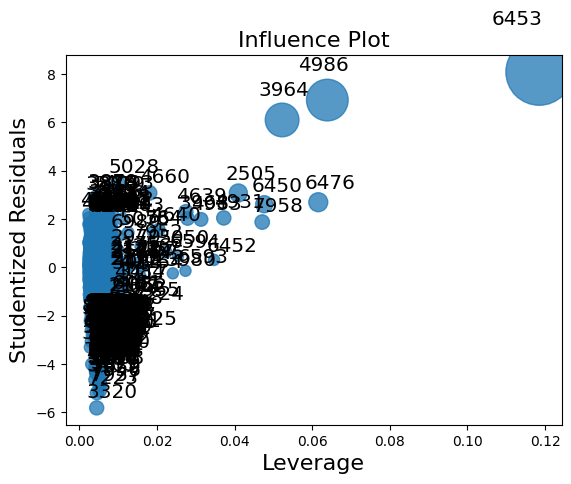

In [898]:
fig = sm.graphics.influence_plot(model_Final, criterion="cooks")

In [899]:
# disntacia de Cook
model_cooksd = model_Final.get_influence().cooks_distance[0]

# get length of df to obtain n
n = X_trainR.shape[0]

# umbral
critical_d = 4/n
print('Umbral con distancia de Cook:', critical_d)

# puntos que podrían ser ourliers con alta influencia
out_d = model_cooksd > critical_d

print(X_trainR.index[out_d], "\n", model_cooksd[out_d])

Umbral con distancia de Cook: 0.0005906674542232723
Index([3201, 3407, 6409, 7684, 7190, 7685, 4096, 6904, 5844, 6903,
       ...
       7955, 4509,  505, 3981,  152,  715, 4059, 3428,  562, 5056],
      dtype='int64', length=349) 
 [0.00106044 0.00096878 0.00069292 0.0009172  0.00063247 0.0015382
 0.00085273 0.00080432 0.00060962 0.00060652 0.00226334 0.00103475
 0.00059227 0.00112241 0.00163957 0.0006259  0.0010043  0.00109195
 0.00230316 0.0007306  0.00159245 0.00146186 0.00112201 0.00103153
 0.00063301 0.00215994 0.00061079 0.00110761 0.00115378 0.00256845
 0.00062448 0.00322628 0.00271148 0.001156   0.00113922 0.00082179
 0.00069549 0.00224383 0.00341056 0.00062015 0.00090927 0.0011176
 0.00172669 0.00061832 0.0006541  0.06365994 0.00062655 0.00219717
 0.00080304 0.00071198 0.01262005 0.00350717 0.00088049 0.00074077
 0.00105967 0.00251996 0.00160733 0.00154762 0.00102013 0.00086718
 0.01486191 0.00098137 0.00108888 0.00266009 0.00203224 0.0006166
 0.00076947 0.00070499 0.00059762

In [900]:
X_trainR[out_d]

const  Temperature(C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
3201    1.0             7.5           94               1.5               506   
3407    1.0            11.3           94               1.6               368   
6409    1.0            20.5           89               0.5               235   
7684    1.0            12.4           87               1.0               317   
7190    1.0            23.4           35               1.6              1972   
...     ...             ...          ...               ...               ...   
715     1.0             2.3           89               0.6                96   
4059    1.0            13.0            0               0.8              2000   
3428    1.0             9.4           95               1.6               740   
562     1.0             4.8           96               0.6                87   
5056    1.0            22.2           97               1.1              1745   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Hour_1  Hour_2  \
3201                     0.15           1.5            0.0       0       0   
3407                     0.00           3.0            0.0       0       0   
6409                     0.00           1.5            0.0       1       0   
7684                     0.24           1.0            0.0       0       0   
7190                     2.51           0.0            0.0       0       0   
...                       ...           ...            ...     ...     ...   
715                      0.00           0.0            0.0       0       0   
4059                     0.00           0.0            0.0       0       0   
3428                     0.00           1.0            0.0       0       0   
562                      0.04           0.0            0.0       0       0   
5056                     0.25           1.0            0.0       0       0   

      ...  Hour_18  Hour_19  Hour_20  Hour_21  Hour_22  Hour_23  \
3201  ...        0        0        0        0        0        0   
3407  ...        0        0        0        0        0        1   
6409  ...        0        0        0        0        0        0   
7684  ...        0        0        0        0        0        0   
7190  ...        0        0        0        0        0        0   
...   ...      ...      ...      ...      ...      ...      ...   
715   ...        0        1        0        0        0        0   
4059  ...        0        0        0        0        0        0   
3428  ...        0        0        1        0        0        0   
562   ...        0        0        0        0        0        0   
5056  ...        0        0        0        0        0        0   

      Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  
3201               1               0               0                   1  
3407               1               0               0                   1  
6409               0               1               0                   1  
7684               0               0               0                   1  
7190               0               0               0                   0  
...              ...             ...             ...                 ...  
715                0               0               1                   1  
4059               1               0               0                   1  
3428               1               0               0                   1  
562                0               0               1                   0  
5056               0               1               0                   1  

[349 rows x 35 columns]

## **Modelo sin la observación 6453**

In [901]:
# Eliminar la instancia 6453
X_train_dropx = X_trainR.drop(index=6453)
Y_train_dropy = y_trainR.drop(index=6453)

# agregar constante explíticamente
new_model = sm.OLS(Y_train_dropy, X_train_dropx).fit()

print(new_model.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Rented Bike Count Transformed   R-squared:                       0.742
Model:                                       OLS   Adj. R-squared:                  0.741
Method:                            Least Squares   F-statistic:                     571.2
Date:                           Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                                   15:45:57   Log-Likelihood:                -16849.
No. Observations:                           6771   AIC:                         3.377e+04
Df Residuals:                               6736   BIC:                         3.401e+04
Df Model:                                     34                                         
Covariance Type:                       nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------

### Verificacion de Heterocedasticidad con estos datos

In [902]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(new_model.resid, new_model.model.exog)

# Extraer los resultados del test
bp_test_stat = bp_test[0]
bp_test_pvalue = bp_test[1]
bp_test_fvalue = bp_test[2]
bp_test_f_pvalue = bp_test[3]

# Imprimir los resultados
print(f"Breusch-Pagan Test Statistic: {bp_test_stat}")
print(f"Breusch-Pagan Test p-value: {bp_test_pvalue}")
print(f"Breusch-Pagan Test F-Statistic: {bp_test_fvalue}")
print(f"Breusch-Pagan Test F p-value: {bp_test_f_pvalue}")

Breusch-Pagan Test Statistic: 1414.4942122112586
Breusch-Pagan Test p-value: 1.3456344641577214e-275
Breusch-Pagan Test F-Statistic: 52.31699100194666
Breusch-Pagan Test F p-value: 3.1359409620756e-311


In [903]:
import numpy as np
# Aplicar la transformación logarítmica a la variable dependiente
y_log = np.log(y + 1)  # Se suma 1 para evitar log(0)

X_trainHomo2, X_test, y_trainHomo2, y_test = train_test_split(X_AfterTest, y_log, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_trainHomo2 = sm.add_constant(X_trainHomo2)

# Eliminar la instancia 6453
X_trainHomo2 = X_trainHomo2.drop(index=6453)
y_trainHomo2 = y_trainHomo2.drop(index=6453)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS)
modelHomo2 = sm.OLS(y_trainHomo2, X_trainHomo2).fit()


# Realizar el test de Breusch-Pagan
bp_test_log = het_breuschpagan(modelHomo2.resid, modelHomo2.model.exog)

# Extraer los resultados del test
bp_test_stat_log = bp_test_log[0]
bp_test_pvalue_log = bp_test_log[1]
bp_test_fvalue_log = bp_test_log[2]
bp_test_f_pvalue_log = bp_test_log[3]

# Imprimir los resultados
print(f"Breusch-Pagan Test Statistic (log): {bp_test_stat_log}")
print(f"Breusch-Pagan Test p-value (log): {bp_test_pvalue_log}")
print(f"Breusch-Pagan Test F-Statistic (log): {bp_test_fvalue_log}")
print(f"Breusch-Pagan Test F p-value (log): {bp_test_f_pvalue_log}")


Breusch-Pagan Test Statistic (log): 1500.8679107586822
Breusch-Pagan Test p-value (log): 6.0869685885403754e-294
Breusch-Pagan Test F-Statistic (log): 56.42143574211789
Breusch-Pagan Test F p-value (log): 0.0


In [904]:
# Estrategia 3: Modelos de Regresión Ponderada

X_trainRP, X_test, y_trainRP, y_test = train_test_split(X_AfterTest, y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_trainRP = sm.add_constant(X_trainRP)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS)

X_trainRP = X_trainRP.drop(index=6453)
y_trainRP = y_trainRP.drop(index=6453)

# Ajustar el modelo OLS inicial para obtener los residuos
initial_model = sm.OLS(y_trainRP, X_trainRP).fit()

weights = 1 / initial_model.resid**2
model_weighted2 = sm.WLS(y_trainRP, X_trainRP, weights=weights).fit()
print(model_weighted2.summary())

# Realizar el test de Breusch-Pagan en el modelo ponderado
bp_test_weighted2 = het_breuschpagan(model_weighted2.resid, model_weighted2.model.exog)

# Extraer los resultados del test
bp_test_stat_weighted = bp_test_weighted2[0]
bp_test_pvalue_weighted = bp_test_weighted2[1]
bp_test_fvalue_weighted = bp_test_weighted2[2]
bp_test_f_pvalue_weighted = bp_test_weighted2[3]

# Imprimir los resultados del test
print(f"Breusch-Pagan Test Statistic (weighted): {bp_test_stat_weighted}")
print(f"Breusch-Pagan Test p-value (weighted): {bp_test_pvalue_weighted}")
print(f"Breusch-Pagan Test F-Statistic (weighted): {bp_test_fvalue_weighted}")
print(f"Breusch-Pagan Test F p-value (weighted): {bp_test_f_pvalue_weighted}")

                                  WLS Regression Results                                 
Dep. Variable:     Rented Bike Count Transformed   R-squared:                       1.000
Model:                                       WLS   Adj. R-squared:                  1.000
Method:                            Least Squares   F-statistic:                 8.678e+06
Date:                           Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                                   15:50:09   Log-Likelihood:                -11610.
No. Observations:                           6771   AIC:                         2.329e+04
Df Residuals:                               6736   BIC:                         2.353e+04
Df Model:                                     34                                         
Covariance Type:                       nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------

In [905]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan


# Ajustar el modelo OLS con errores estándar robustos
model_robust = sm.OLS(Y_train_dropy, X_train_dropx).fit(cov_type='HC3')

# Imprimir el resumen del modelo
print(model_robust.summary())

# Realizar el test de Breusch-Pagan en el modelo robusto
bp_test_robust = het_breuschpagan(model_robust.resid, model_robust.model.exog)

# Extraer los resultados del test
bp_test_stat_robust = bp_test_robust[0]
bp_test_pvalue_robust = bp_test_robust[1]
bp_test_fvalue_robust = bp_test_robust[2]
bp_test_f_pvalue_robust = bp_test_robust[3]

# Imprimir los resultados del test
print(f"Breusch-Pagan Test Statistic (robust): {bp_test_stat_robust}")
print(f"Breusch-Pagan Test p-value (robust): {bp_test_pvalue_robust}")
print(f"Breusch-Pagan Test F-Statistic (robust): {bp_test_fvalue_robust}")
print(f"Breusch-Pagan Test F p-value (robust): {bp_test_f_pvalue_robust}")

                                  OLS Regression Results                                 
Dep. Variable:     Rented Bike Count Transformed   R-squared:                       0.742
Model:                                       OLS   Adj. R-squared:                  0.741
Method:                            Least Squares   F-statistic:                     711.8
Date:                           Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                                   15:50:41   Log-Likelihood:                -16849.
No. Observations:                           6771   AIC:                         3.377e+04
Df Residuals:                               6736   BIC:                         3.401e+04
Df Model:                                     34                                         
Covariance Type:                             HC3                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
--------

### Verificacion de Especificación con estos datos

In [906]:
from statsmodels.stats.diagnostic import linear_reset

reset_test = linear_reset(new_model, power=2, use_f=True)

# Imprimir los resultados del test
print(reset_test)

<F test: F=385.97952026178007, p=1.3150125886726674e-83, df_denom=6.74e+03, df_num=1>


### Evaluacion de variables significativas

In [907]:
# Identificar variables no significativas (p > 0.05)
variables_no_significativas = new_model.pvalues[new_model.pvalues > 0.05].index.tolist()

# Eliminar variables no significativas
X_train_dropx_reduced = X_train_dropx.drop(columns=variables_no_significativas)

# Ajustar el modelo final
new_model_reduced = sm.OLS(Y_train_dropy, X_train_dropx_reduced).fit()

# Imprimir el resumen del modelo final
print(new_model_reduced.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Rented Bike Count Transformed   R-squared:                       0.742
Model:                                       OLS   Adj. R-squared:                  0.741
Method:                            Least Squares   F-statistic:                     626.6
Date:                           Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                                   15:52:57   Log-Likelihood:                -16849.
No. Observations:                           6771   AIC:                         3.376e+04
Df Residuals:                               6739   BIC:                         3.398e+04
Df Model:                                     31                                         
Covariance Type:                       nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------

In [908]:
print(new_model_reduced.rsquared, new_model_reduced.rsquared_adj)

0.7424271510475061 0.7412422930095884


In [909]:
print("\nComparación de R^2 y R^2 ajustado:")
print(f"R^2 con la instancia 6453: {model_Final.rsquared}")
print(f"R^2 ajustado con la instancia 6453: {model_Final.rsquared_adj}")
print(f"R^2 sin la instancia 6453: {new_model_reduced.rsquared}")
print(f"R^2 ajustado sin la instancia 6453: {new_model_reduced.rsquared_adj}")


Comparación de R^2 y R^2 ajustado:
R^2 con la instancia 6453: 0.7399807789632767
R^2 ajustado con la instancia 6453: 0.7387848448605856
R^2 sin la instancia 6453: 0.7424271510475061
R^2 ajustado sin la instancia 6453: 0.7412422930095884


## Resumen variables de interes sin la instancia 6453


#### Coficientes del modelo

In [944]:
import pandas as pd

# Suponiendo que coeficients y coeficientesRed ya están definidos
coeficientesRed = new_model_reduced.params

# Crear un DataFrame con los coeficientes
df = pd.DataFrame({
    'Coeficientes Modelo Reducido': coeficientesRed
})

# Imprimir la tabla
print(df)

                         Coeficientes Modelo Reducido
const                                       18.863284
Temperature(C)                               0.210172
Humidity(%)                                 -0.072198
Wind speed (m/s)                            -0.140848
Solar Radiation (MJ/m2)                      0.397738
Rainfall(mm)                                -1.161975
Hour_1                                      -1.022797
Hour_2                                      -2.538409
Hour_3                                      -4.148855
Hour_4                                      -5.410030
Hour_5                                      -5.296757
Hour_6                                      -2.483916
Hour_7                                       0.828508
Hour_8                                       3.554421
Hour_9                                       0.628419
Hour_10                                     -1.619980
Hour_11                                     -1.346580
Hour_12                     